In [9]:
import pandas as pd

In [10]:
dataset = "bmi.csv"
df = pd.read_csv(dataset)

In [11]:
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [13]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
# Load dataset diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', C=1.0)

# Melatih model SVM
svm_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred = svm_model.predict(X_test)

# Evaluasi model SVM
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.011235955056179775
Classification Report:
               precision    recall  f1-score   support

        37.0       0.00      0.00      0.00         1
        42.0       0.00      0.00      0.00         1
        48.0       0.00      0.00      0.00         2
        52.0       0.00      0.00      0.00         2
        60.0       0.00      0.00      0.00         1
        61.0       0.00      0.00      0.00         1
        63.0       0.00      0.00      0.00         2
        64.0       0.00      0.00      0.00         1
        67.0       0.00      0.00      0.00         1
        68.0       0.00      0.00      0.00         1
        69.0       0.00      0.00      0.00         1
        70.0       0.00      0.00      0.00         1
        71.0       0.00      0.00      0.00         0
        72.0       0.00      0.00      0.00         3
        77.0       0.00      0.00      0.00         1
        84.0       0.00      0.00      0.00         2
        87.0       0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [14]:
# Inisialisasi model SVR
svr_model = SVR(C=1000, gamma=0.05, kernel='rbf')

# Melatih model SVR
svr_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_svr_pred = svr_model.predict(X_test)

# Evaluasi model SVR
mse = mean_squared_error(y_test, y_svr_pred)
print(f'Mean Squared Error (SVM): {mse}')

Mean Squared Error (SVM): 2982.186193535446


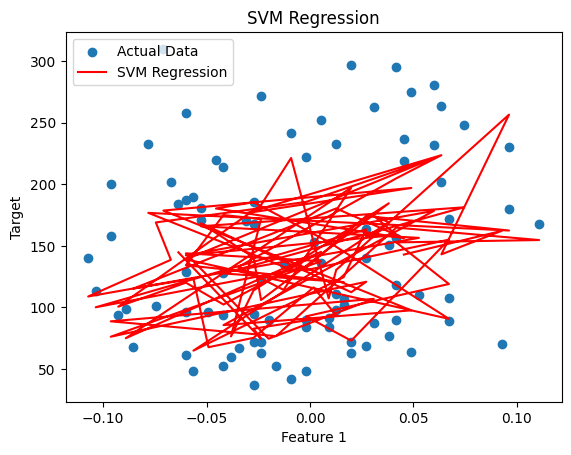

In [15]:
# Visualisasi data dan model SVR
plt.scatter(X_test[:, 0], y_test, label='Actual Data')
plt.plot(X_test[:, 0], y_svr_pred, color='red', label='SVM Regression')

# Label sumbu
plt.xlabel('Feature 1')  # Adjust the feature index accordingly
plt.ylabel('Target')

# Menambahkan judul
plt.title('SVM Regression')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

# Tentukan hyperparameter yang akan diuji
param_grid = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}

# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(svr_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Gunakan model terbaik untuk membuat prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Best Parameters: {'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Squared Error on Test Set: 2935.866393117472


In [17]:
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

SVR(C=100000, gamma=0.005)

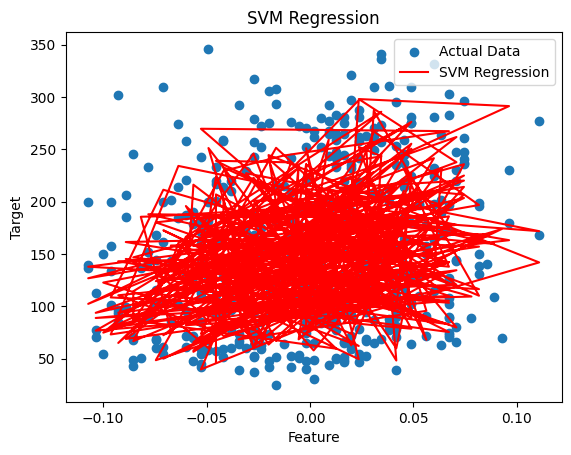

In [18]:
import matplotlib.pyplot as plt

# Visualisasi data aktual
plt.scatter(X[:, 0], y, label='Actual Data')  # Ganti indeks 0 sesuai dengan dimensi yang sesuai

# Visualisasi hasil prediksi dari model SVM
plt.plot(X[:, 0], model_baru.predict(X), color='red', label='SVM Regression')  # Ganti indeks 0 sesuai dengan dimensi yang sesuai

# Label sumbu
plt.xlabel('Feature')
plt.ylabel('Target')

# Menambahkan judul
plt.title('SVM Regression')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()